In [20]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [21]:
iris = pd.read_csv('../../assets/datasets/iris.csv')

In [22]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [23]:
x = iris.ix[:,0:4].values
y = iris.ix[:,4].values

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [24]:
x_standard = StandardScaler().fit_transform(x)

Now, let's set up our data for decomposition by creating a covariance matrix

Now, decompose the the covariance matrix

In [25]:
cov_mat = np.cov(x_standard.T)
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Check the eigenvalues and eigenvectors

In [26]:
print(eigenValues)

[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [27]:
print(eigenVectors)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Calculate variance explained

In [28]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[  72.77045209   95.80097536   99.48480732  100.        ]


**Bonus**: transform the original data into the the space describe by the first two PCs. Plot the data, coloring by flower type.

In [29]:
W = np.hstack((eigenVectors[0].reshape(4,1), eigenVectors[1].reshape(4,1))) # Our transformation matrix
W

array([[ 0.52237162, -0.26335492],
       [-0.37231836, -0.92555649],
       [-0.72101681,  0.24203288],
       [ 0.26199559, -0.12413481]])

In [ ]:
X_reduced = x_standard.dot(W)
X_reduced = pd.DataFrame(X_reduced)

In [37]:
iris['Name'].value_counts().index

Index([u'Iris-setosa', u'Iris-versicolor', u'Iris-virginica'], dtype='object')

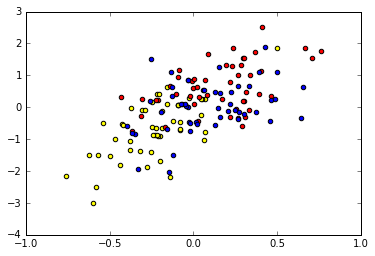

In [40]:
X_reduced['type'] = iris['Name']
names = [u'Iris-setosa', u'Iris-versicolor', u'Iris-virginica']
colors = ['yellow', 'red', 'blue']
for name, col in zip(names, colors):
    sub = X_reduced[X_reduced['type']==name]
    plt.scatter(x=sub.iloc[:,0], y=sub.iloc[:,1], c=col)